<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Python/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("font", size=20)
plt.rcParams['figure.figsize'] = (20,10)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
figsize=(10,6)
random_state = 1

df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid.csv")

df.drop(["NUMERO","SEMANA","NUMERO_ENTREVISTA","NUMERO_ORDEM","UF","SITUACAO","DOMICILIO","RESPONDEU","ESCOLARIDADE"], axis="columns", inplace=True)
df.drop(["B006"], axis="columns", inplace=True)


## Regressão Logística

In [6]:
df.columns
df['B005'].value_counts()

4    57653
2     6372
1      717
3      101
9        3
Name: B005, dtype: int64

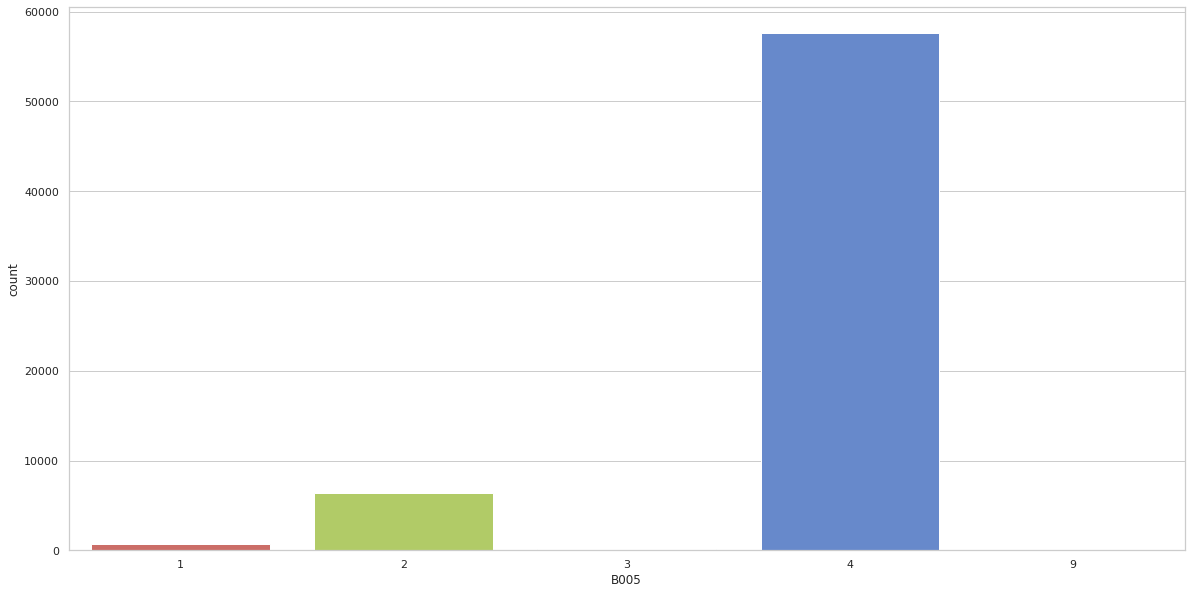

In [3]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(x='B005',data=df,palette='hls')
plt.show()

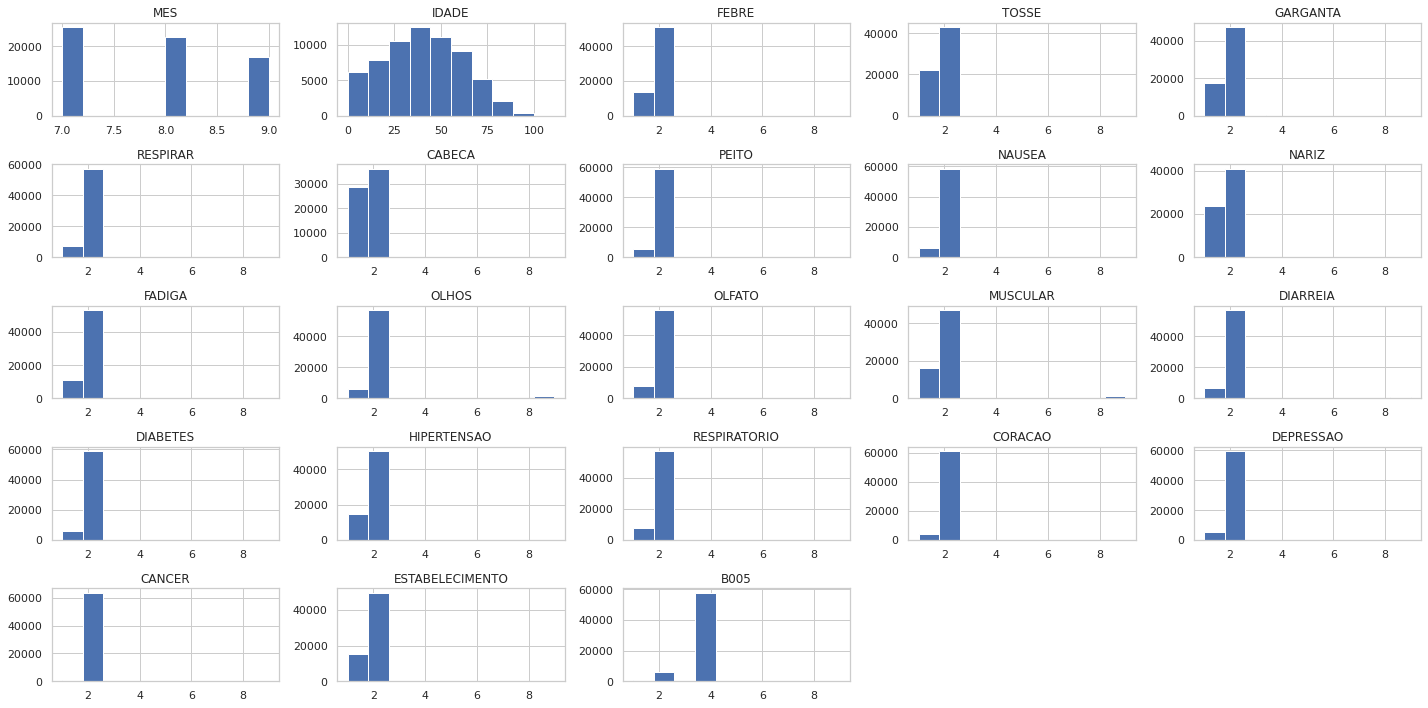

In [7]:
df.hist()
plt.tight_layout()

In [ ]:
 #df[df.isnull().sum(axis = 1)>0]
 #df.shape
 #df.columns
 #df.head()

In [ ]:
#dummify educacao
dummy_raca = pd.get_dummies(df['RACA'],prefix='RACA')
dummy_genero = pd.get_dummies(df['GENERO'],prefix='GENERO')


In [ ]:
dummy_genero.head()

,GENERO_Homem,GENERO_Mulher
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df['RACA'].values.reshape((len(df),1)))
enc.fit(df['GENERO'].values.reshape((len(df),1)))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [ ]:
enc.categories_

[array(['Homem', 'Mulher'], dtype=object)]

In [ ]:
enc.transform(df['GENERO'].values.reshape((len(df),1))).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
df = df.drop(['GENERO'], axis=1)
df = df.drop(['RACA'], axis=1)

In [ ]:
df.head()

,MES,IDADE,FEBRE,TOSSE,GARGANTA,RESPIRAR,CABECA,PEITO,NAUSEA,NARIZ,FADIGA,OLHOS,OLFATO,MUSCULAR,DIARREIA,DIABETES,HIPERTENSAO,RESPIRATORIO,CORACAO,DEPRESSAO,CANCER,ESTABELECIMENTO,B005
0,7,46,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4
1,7,35,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4
2,7,36,1,1,2,1,1,1,2,2,1,2,1,1,1,2,2,2,2,2,2,1,4
3,7,35,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,4
4,7,33,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,4


In [ ]:
df = df.join(dummy_raca)
df = df.join(dummy_genero)
df.head()

,MES,IDADE,FEBRE,TOSSE,GARGANTA,RESPIRAR,CABECA,PEITO,NAUSEA,NARIZ,FADIGA,OLHOS,OLFATO,MUSCULAR,DIARREIA,DIABETES,HIPERTENSAO,RESPIRATORIO,CORACAO,DEPRESSAO,CANCER,ESTABELECIMENTO,B005,RACA_Amarela,RACA_Branca,RACA_Ignorado,RACA_Indígena,RACA_Parda,RACA_Preta,GENERO_Homem,GENERO_Mulher
0,7,46,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,0,0,0,0,1,0,1,0
1,7,35,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,0,0,0,0,1,0,0,1
2,7,36,1,1,2,1,1,1,2,2,1,2,1,1,1,2,2,2,2,2,2,1,4,0,0,0,0,1,0,0,1
3,7,35,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,4,0,0,0,0,1,0,1,0
4,7,33,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1,4,0,0,0,0,1,0,0,1


In [ ]:
target = df['B005']

In [ ]:
train, test, train_labels, test_labels = train_test_split(df,
                                                          target,
                                                          test_size=0.3,
                                                          random_state=42)

train.shape

train_labels.shape

(45392,)

In [ ]:
# cria um objeto do tipo regressão linear
regr = linear_model.LinearRegression()

# treina o objeto
regr.fit(train, train_labels)

# faz as previsões usando os dados de teste
pred = regr.predict(test)

In [ ]:
# Os coeficientes beta
print('Coeficientes: \n', regr.coef_)
# Erros quadráticos médios
print("Erros quadráticos médios: %.2f"
      % mean_squared_error(test_labels, pred))
# Variância: 1 é a predição perfeita
print('Variância: %.2f' % r2_score(test_labels, pred))

Coeficientes: 
 [ 1.68805649e-16  4.16333634e-17 -3.04843109e-16  2.70537130e-17
 -5.39162840e-16 -6.02166143e-16 -4.05024688e-16 -3.31156535e-16
 -2.24035233e-16 -4.61167831e-16 -3.93356699e-16 -1.22247734e-15
 -6.05157488e-16 -7.14441378e-16 -6.78562223e-16  4.96794807e-16
  1.48126534e-16  4.77238691e-16  3.20415623e-16  4.31702200e-16
  8.07595093e-17  6.45805024e-16  1.00000000e+00  1.59589689e-16
  1.90033536e-16  3.19812483e-16  1.06993814e-16  4.73931875e-17
  1.75098651e-17  3.98161601e-17 -1.44963336e-17]
Erros quadráticos médios: 0.00
Variância: 1.00


In [ ]:
#fig = plt.figure(figsize=figsize)
# Plot outputs
#plt.scatter(test, test_labels,  color='black')
#plt.scatter(test, pred,  color='blue')

#plt.xticks(())
#plt.yticks(())

#plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


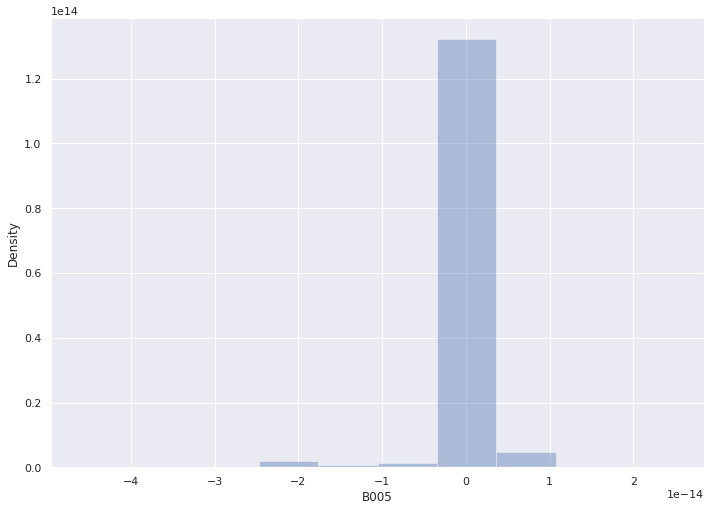

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(pred - test_labels, bins=10)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=2000).fit(train, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
preds = clf.predict(test)

In [ ]:
from sklearn.metrics import accuracy_score

# Avaliar a precisão
print(accuracy_score(test_labels, preds))

0.9998457900688804


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, preds)

array([[  233,     0,     0,     0,     0],
       [    0,  1876,     0,     0,     0],
       [    0,     2,    27,     0,     0],
       [    0,     0,     0, 17315,     0],
       [    0,     0,     0,     1,     0]])

In [ ]:
clf.predict_proba(test)[0:10]

array([[2.56895611e-18, 1.20220493e-07, 3.98749862e-05, 9.99960005e-01,
        8.77805144e-15],
       [6.87845015e-18, 1.93898903e-07, 3.70906890e-05, 9.99962715e-01,
        1.02108560e-13],
       [4.72811428e-17, 1.83163898e-06, 2.26119490e-03, 9.97736973e-01,
        7.64887120e-12],
       [2.84080841e-18, 1.44461530e-07, 9.42215357e-05, 9.99905634e-01,
        3.04178807e-13],
       [4.03286739e-18, 1.52572029e-07, 2.89111111e-05, 9.99970936e-01,
        1.32061901e-14],
       [3.86297695e-18, 9.24556194e-08, 7.64453390e-05, 9.99923462e-01,
        1.24592627e-13],
       [3.09117703e-18, 1.41681622e-07, 7.25803854e-05, 9.99927278e-01,
        2.28630993e-13],
       [8.44839905e-19, 8.25824514e-08, 4.36846911e-05, 9.99956233e-01,
        3.50838066e-15],
       [8.33410745e-18, 1.86928011e-07, 7.01106036e-05, 9.99929702e-01,
        1.72966644e-11],
       [2.18516883e-18, 1.06048446e-07, 3.21318051e-05, 9.99967762e-01,
        6.45643479e-13]])

# Medindo a qualidade da regressão

## O R-Quadrado (R2) Score

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_error = mean_absolute_error(test_labels, pred)
print('\nErro {}'.format(mean_error))

mean_s_error = mean_squared_error(test_labels, pred)
print('\nErro {}'.format(mean_s_error))

r2 = r2_score(test_labels, pred) 
print('\nR2 Score {}'.format(r2))


Erro 1.5655890962859486e-15

Erro 1.2861117422641624e-29

R2 Score 1.0


## Outros métodos de regressão

## Regressor Perceptron multicamadas.

Este modelo, baseado em rede neural, otimiza a perda quadrática usando LBFGS (Broyden, Fletcher, Goldfarb, Shanno) ou descida gradiente estocástica.

O MLPRegressor treina iterativamente, uma vez que em cada etapa de tempo as derivadas parciais da função de perda com relação aos parâmetros do modelo são calculadas para atualizar os parâmetros.

In [ ]:
from sklearn.neural_network import MLPRegressor

estimatorNN = MLPRegressor(
                          learning_rate = 'adaptive',
                          random_state = random_state,
                          verbose=False,
                            max_iter = 200,
                        hidden_layer_sizes = [100,50,40,30,20,10],   
                solver = 'adam',
                alpha = 0.0001,
                activation = 'relu'
                        )

estimatorNN.fit(train, train_labels)

# faz as previsões usando os dados de teste
mean_error = mean_absolute_error(test_labels, estimatorNN.predict(test))
print('\nErro {}'.format(mean_error))

mean_s_error = mean_squared_error(test_labels, estimatorNN.predict(test))
print('\nErro {}'.format(mean_s_error))

r2 = r2_score(test_labels, estimatorNN.predict(test)) 
print('\nR2 Score {}'.format(r2))


Erro 0.007313029830674903

Erro 0.00036040508145196985

R2 Score 0.9991871513894297


## Árvore de decisão para regressão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

estimatorTree = DecisionTreeRegressor(max_depth=5, random_state = random_state)
estimatorTree.fit(train,train_labels)

# faz as previsões usando os dados de teste
mean_error = mean_absolute_error(test_labels, estimatorTree.predict(test))
print('\nErro {}'.format(mean_error))

mean_s_error = mean_squared_error(test_labels, estimatorTree.predict(test))
print('\nErro {}'.format(mean_s_error))

r2 = r2_score(test_labels, estimatorTree.predict(test)) 
print('\nR2 Score {}'.format(r2))


Erro 0.0

Erro 0.0

R2 Score 1.0


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

estimatorRF = RandomForestRegressor(max_depth=5, random_state = random_state)
estimatorRF.fit(train,train_labels)

# faz as previsões usando os dados de teste
mean_error = mean_absolute_error(test_labels, estimatorRF.predict(test))
print('\nErro {}'.format(mean_error))

mean_s_error = mean_squared_error(test_labels, estimatorRF.predict(test))
print('\nErro {}'.format(mean_s_error))

r2 = r2_score(test_labels, estimatorRF.predict(test)) 
print('\nR2 Score {}'.format(r2))


Erro 3.5982317261231584e-05

Erro 2.5187622082862085e-05

R2 Score 0.9999431924668455
